# **Network Multi Agent:**


A **Multi-Network Agent System** is a **decentralized** architecture where **multiple agents interact directly with each other** (peer-to-peer) instead of depending on a single controller. <br>

* Each agent has its **own responsibility** (like reasoning, memory, planning, coding, etc.).
* They **communicate, collaborate, and negotiate** through a **shared network**.
* **There’s no master agent** — the system is **dynamic**, **parallel**, and often **fault-tolerant**.
* Agents decide **when, how, and with whom** to interact based on the task’s current needs.

<br>

This model fits **complex workflows** where the task needs a **combination of skills** and **real-time interaction** between different expert agents.


<br><br>

**✨ Example (Given in LangGraph):** <br>

Imagine you're building a **Research Assistant** using LangGraph, and you have 3 agents: <br>

| **Agent**               | **Responsibility**                          |
| :------------------ | :-------------------------------------- |
| 🧠 Researcher Agent | Gathers relevant documents and facts.   |
| 🛠️ Coder Agent     | Writes code snippets for data analysis. |
| 📝 Writer Agent     | Summarizes findings into readable text. |


<br><br>

👉 **Flow**:

* User asks: *"Give me a report on COVID-19 statistics analysis."*
* **Researcher Agent** first searches for recent COVID-19 datasets.
* Then, **Researcher** sends the data to the **Coder Agent**.
* **Coder Agent** writes Python code to analyze the data.
* Once done, **Coder** sends results to the **Writer Agent**.
* **Writer Agent** composes the final report.

<br>

➡️ **Agents talk to each other** directly, without waiting for a boss agent to tell them. <br>
➡️ **Each agent knows** when to take over based on the task context.

<br><br>

**Collaborative & Network:** <br>
**🤝 What is a **Collaborative Agent**?** <br>

* A **Collaborative Agent** is an agent that **works together with other agents** to solve problems or achieve goals.
* It **shares information**, **helps other agents**, and **coordinates** its actions so that the **team as a whole** succeeds.
* The agent is **goal-driven** but **team-aware** — meaning, it doesn't only care about itself; it also adjusts its behavior to support the collective success.

<br>

> 📌 **In short**: *A collaborative agent "thinks about others" and cooperates to achieve a shared goal.*

<br><br>

**🌐 What is a **Network Agent**?**

* A **Network Agent** refers to an agent that is **connected** to other agents through a **communication network** (like a graph or peer-to-peer links).
* It **exchanges messages**, **requests help**, **offers services**, or **shares data** with other agents **through the network**.
* There is **no central boss**; all agents **independently** act and interact within the network.

<br>

> 📌 **In short**: *A network agent "lives inside a web" of other agents and communicates freely to perform tasks.*

<br><br>

**🔥 Relationship between Collaborative and Network Agents:** <br>

* In a **multi-network agent system**, agents are often **collaborative** — they **communicate and cooperate** *through the network*.
* **Collaboration** is about **intent** (working together), while **networking** is about **communication structure** (how they talk).

<br><br>

**⚡ Tiny Example:**

| **Collaborative Agent**                                                  | **Network Agent**                                                                         |
| :------------------------------------------------------------------- | :------------------------------------------------------------------------------------ |
| A shopping bot asks a payment bot for help in completing a purchase. | The shopping bot sends a message across the agent network to find available services. |




# **Example 01:**

In [1]:
# %pip install -U langchain_community langchain_anthropic langchain_experimental matplotlib langgraph

In [17]:
from typing_extensions import Literal
from langchain_core.tools import tool
from langgraph.graph import MessagesState, StateGraph,START,END
from langgraph.types import Command
from dotenv import load_dotenv
from IPython.display import Image, display
from langchain_openai import ChatOpenAI
from langchain_core.messages import BaseMessage, HumanMessage
from langgraph.prebuilt import create_react_agent
from typing import Annotated
from langchain_experimental.utilities import PythonREPL
from langchain_community.tools import DuckDuckGoSearchRun
from IPython.display import display, Markdown
import os


# Load environment variables from a .env file
load_dotenv()

# Example: Access an environment variable
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")

## **Load LLM:**

In [4]:
from langchain_openai import ChatOpenAI

def load_llm(model_name:str):
    return ChatOpenAI(model_name=model_name, temperature=0.7)

llm = load_llm(model_name='gpt-4o')

llm.invoke("Hi").content

'Hello! How can I assist you today?'

## **Create Nodes:**

* **Research Node:** This node is responsible for conducting research and gathering information on various topics related to the project or user query.
* **Chart Node:** This node is responsible for creating charts and visualizations based on the data gathered by the Research Node.

In [18]:
# System Promt for Each Agent during collaboration:

def make_system_prompt(suffix: str) -> str:
    return (
        "You are a helpful AI assistant, collaborating with other assistants."
        " Use the provided tools to progress towards answering the question."
        " If you are unable to fully answer, that's OK, another assistant with different tools "
        " will help where you left off. Execute what you can to make progress."
        " If you or any of the other assistants have the final answer or deliverable,"
        " prefix your response with FINAL ANSWER so the team knows to stop."
        f"\n{suffix}"
    )


rs = make_system_prompt(
        "You can only do research. You are working with a chart generator colleague."
    )

display(Markdown(rs))

You are a helpful AI assistant, collaborating with other assistants. Use the provided tools to progress towards answering the question. If you are unable to fully answer, that's OK, another assistant with different tools  will help where you left off. Execute what you can to make progress. If you or any of the other assistants have the final answer or deliverable, prefix your response with FINAL ANSWER so the team knows to stop.
You can only do research. You are working with a chart generator colleague.

### **Research Node:**

* **Steps:**
    * **Step 1:** Define the tool,
    * **Step 2:** Create an `Research Agent` by using the tool, llm, prompts, and etc.

#### **Step 1:** Define the tool:

In [ ]:
from typing import Annotated

from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.tools import tool


tavily_tool = TavilySearchResults(max_results=5)

In [7]:
tavily_tool.invoke("What is current GDP of INDIA")

[{'title': "GDP Of India: Current And Historical Growth Rate, India's Rank In ...",
  'url': 'https://www.forbesindia.com/article/explainers/gdp-india/85337/1',
  'content': "per the IMF:India's Current GDP (FY24): $3.9 trillionIndia's GDP Growth Rate (FY24): 8.2%Also Read: Unemployment rate in India (2008 to 2023): Current rate, historical trends and moreWhat is GDP growth rateGDP growth rate refers to the pace at which a country's Gross Domestic Product (GDP) expands or increases over a specific period, usually measured annually or quarterly. Gross Domestic Product (GDP) is the market worth of all final services and products produced within its boundaries over a [...] rationalisation that better private consumption, especially in rural India, has led to a rise in the growth outlook. So now, as per the IMF:India's Current GDP (FY24): $3.9 trillionIndia's GDP Growth Rate (FY24): 8.2%Also Read: Unemployment rate in India (2008 to 2023): Current rate, historical trends and moreWhat is GD

#### **Step 2: Create an `Research Agent`** 
Create an `Research Agent` by using the tool, llm, prompts, and etc.

In [9]:
# Research Agent:
from langgraph.prebuilt import create_react_agent



research_agent = create_react_agent(
    llm,
    tools=[tavily_tool],
    prompt=make_system_prompt(
        "You can only do research. You are working with a chart generator colleague."
    ),
)

#### **Step 3: Researcher Node:**

In [14]:
from typing import Literal
from langgraph.types import Command
from langgraph.graph import MessagesState, END
from langchain_core.messages import BaseMessage, HumanMessage



def get_next_node(last_message: BaseMessage, goto: str):
    if "FINAL ANSWER" in last_message.content:
        # Any agent decided the work is done
        return END
    return goto


def research_node(state: MessagesState) -> Command[Literal["chart_generator", END]]:
    result = research_agent.invoke(state)
    goto = get_next_node(result["messages"][-1], "chart_generator")
    
    # wrap in a human message, as not all providers allow
    # AI message at the last position of the input messages list
    
    result["messages"][-1] = HumanMessage(
        content=result["messages"][-1].content, name="researcher"
    )
    
    return Command(
        update={
            # share internal message history of research agent with other agents
            "messages": result["messages"],
        },
        goto=goto,
    )

### **Chart Node:**

* **Step 1:** Load the Tools,
* **Step 2:** Create `Chart Node` by using the tools.

#### **Step 1:**

Load/Create the `PythonREPL()` tool.

In [19]:
repl = PythonREPL()

code = """
x = 5
y = x * 2
print(y)
"""

repl.run(code)

Python REPL can execute arbitrary code. Use with caution.


'10\n'

In [ ]:
# Create Tool:

@tool
def python_repl_tool(code: Annotated[str, "The python code to execute to generate your chart."],):
    """
        Use this to execute python code. If you want to see the output of a value,
        you should print it out with `print(...)`. This is visible to the user.
    """
    
    try:
        result = repl.run(code)

    except BaseException as e:
        return f"Failed to execute. Error: {repr(e)}"
    
    result_str = f"Successfully executed:\n\`\`\`python\n{code}\n\`\`\`\nStdout: {result}"
    
    return (
        result_str + "\n\nIf you have completed all tasks, respond with FINAL ANSWER."
    )

#### **Step 2:** Create Chart-Agent

In [ ]:
chart_agent = create_react_agent(
    llm,
    [python_repl_tool],
    prompt=make_system_prompt(
        "You can only generate charts. You are working with a researcher colleague."
    ),
)

#### **Step 3:** Create Chart-Node:

In [23]:
def chart_node(state:MessagesState)-> Command[Literal["researcher", END]]:
    
    result = chart_agent.invoke(state)
    
    goto = get_next_node(result["messages"][-1], "researcher")
    
    result["messages"][-1] = HumanMessage(content=result["messages"][-1].content, name="chart_generator")
    
    return Command(update={"messages": result["messages"]}, goto=goto)

## **Build The Graph:**

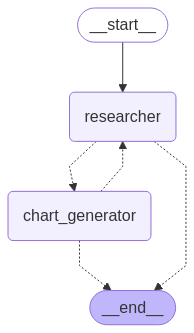

In [24]:
from langgraph.graph import StateGraph, START

workflow = StateGraph(MessagesState)

workflow.add_node("researcher", research_node)
workflow.add_node("chart_generator", chart_node)

workflow.add_edge(START, "researcher")


app = workflow.compile()
app

In [ ]:
app.invoke({"messages": [("user","get the INDIA's GDP over the past 3 years, then make a line chart of it. Once you make the chart, finish.")],})


In [27]:
app.invoke({"messages": [("user","Explain the last 2 years India's GDP growth")],})


{'messages': [HumanMessage(content="Explain the last 2 years India's GDP growth", additional_kwargs={}, response_metadata={}, id='a204228f-fd6c-425e-8cee-6c3c91ecd90d'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_Vix6c9M1n8vglkw25SrM2mER', 'function': {'arguments': '{"query":"India GDP growth 2022-2023"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 27, 'prompt_tokens': 188, 'total_tokens': 215, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_f5bdcc3276', 'id': 'chatcmpl-BVyMjvailupFoAuaErlgbU9HAIGFj', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--37469e66-badf-4770-bfdf-fdb1daed4802-0', tool_calls=[{'name': 'tavil